In [1]:
import os
import numpy as np
import topf
import sklearn.metrics
import matplotlib.pyplot as plt
import plotly.io 
# plotly.io.renderers.default = "png" # Only activate this line if you want to render the plotly plots as png for display on github

# Topological Point Features

Topological Data Analysis (TDA) allows us to extract powerful topological, and higher-order information on the global shape of a data set or point cloud. Tools like Persistent Homology or the Euler Transform give a single complex description of the global structure of the point cloud. However, common machine learning applications like classification require point-level information and features to be available. Topological Point Features (TOPF) is a novel method to extract node-level topological features from complex point clouds using discrete variants of concepts from algebraic topology and differential geometry. For the entire paper, see 

    Vincent P. Grande and Michael T. Schaub: "Point-Level Topological Representation Learning on Point Clouds"

## Basic usage

Given a point cloud of dimension `N x n`, we can obtain a `N x f` topological feature vector for an automatically determined `f` simply by calling `topf(points)`:

In [2]:
base_points = np.loadtxt('TopologicalClusteringBenchmarkSuite/dim1/4spheresTRUE.csv', delimiter=',')[:,:2]
print("Input shape:", base_points.shape)
topological_features = topf.topf(base_points)
print("Feature vector shape:", topological_features.shape)

Input shape: (656, 2)
Feature vector shape: (656, 5)


## Visualisation

### Feature heatmaps

Topological Point Features measure how much a point is contributing to global topological features of the point cloud. We can visualise this in multiple ways: First, let us plot a heatmap of the strength of the feature for all detected topological features. This can be done by passing `draw_signature_heatmaps = "Separate plots"` for one heatmap per feature, or `draw_signature_heatmaps = "One plot"` for a combined heatmap.

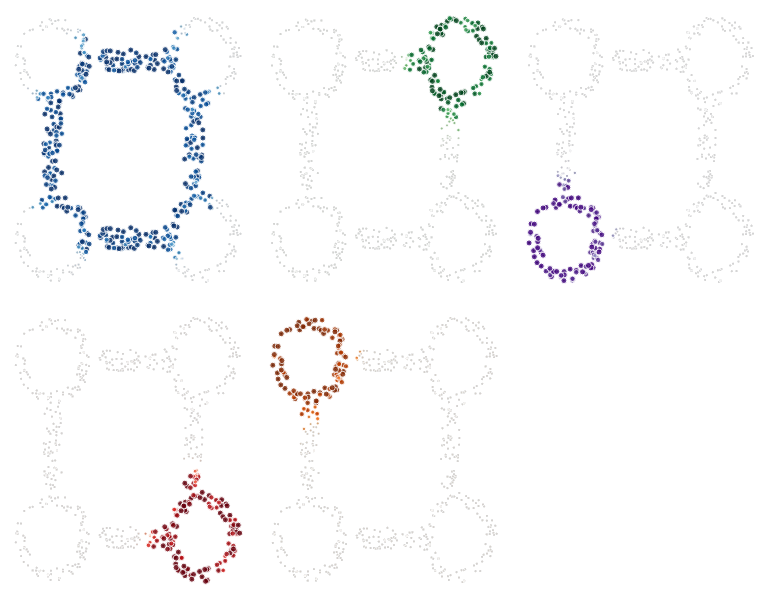

In [3]:
features = topf.topf(base_points, draw_signature_heatmaps="Separate plots")

### Homology representatives

We can plot the selected homology representatives setting `draw_reps = True`.

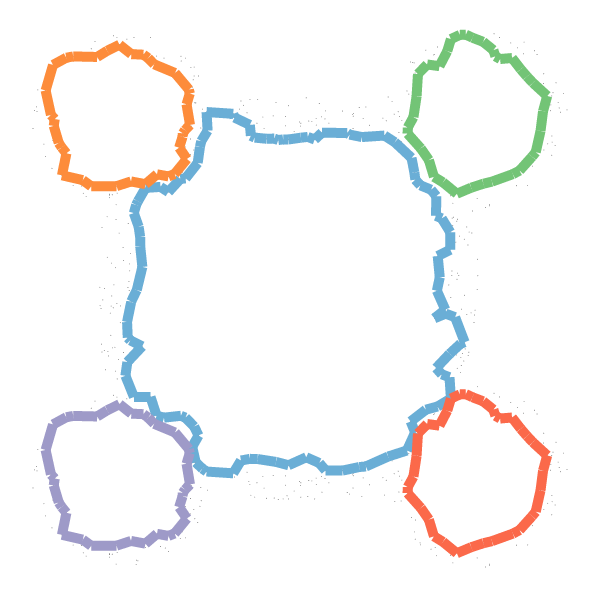

In [4]:
top_features = topf.topf(base_points, draw_reps = True)

### Weighted harmonic representatives

To compute the topological features, TOPF uses scaled weighted harmonic homology representatives. We can plot the simplices with the contributions using `draw_scaled_vecs = True`. To control the number of simplices drawn, we can adjust the threshold to be drawn `simplex_threshs = (t_1,t_2)` for thresholds in dimensions `1` and `2`, and adjust the maximal number of simplices drawn per feature `max_num_simplices_drawn`. The default are `simplex_threshs = (0.1,0.1)` and `max_num_simplices_drawn = 750`.

For performance reasons, not all simplices above specified `simplex_threshs` in current dimension are plotted. Increase threshold or `max_num_simplices_drawn` (default 750) to draw all simplices.


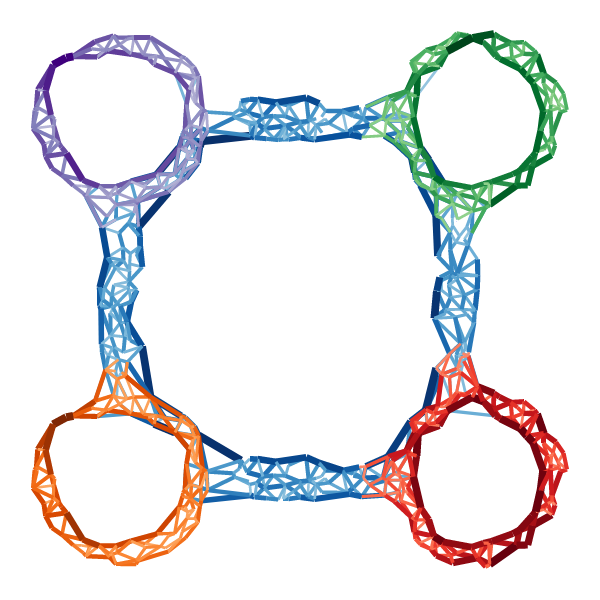

In [5]:
top_features = topf.topf(base_points, draw_scaled_vecs = True)

### Clustering

TOPF can cluster the point cloud according to the topological features. To draw this clustering, we can pass `draw_final_clustering = True`. If we don't pass a desired number of clusters `n_clusters`, TOPF will attempt to determine the cluster number on its own. Sometimes, this does not work out.

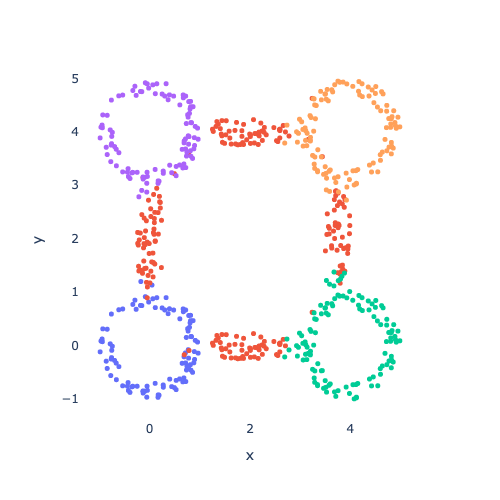

In [6]:
top_features = topf.topf(base_points, draw_final_clustering=True)

## Returning additional information

By passing `return_dict = True`, `topf` will return a dictionary containing additional information. `output_dict['labels']` contains the clustering labels, `'birth_times'` an array containing the birth times of the selected features, `'death_times'` the death times, `'feature_significance'` the significance of the features computed from the birth and death times, and `'feature_dim'` the homology dimensions of the selected features. Because topf detected `5` relevant features in the example above, the associated arrays will all have length `5`.

In [7]:
topological_features, output_dict = topf.topf(base_points, return_dict=True)
print('birth_times of the features: ', output_dict['birth_times'])
print('death_times of the features: ', output_dict['death_times'])
print('feature_significance: ', output_dict['feature_significance'])
print('feature_dim: ', output_dict['feature_dim'])
print('point_labels shape', output_dict['labels'].shape)

birth_times of the features:  [0.14951185313937734, 0.12412153899258675, 0.12412041611955765, 0.147999315202319, 0.1480041106298358]
death_times of the features:  [1.6659916259747707, 0.7129219515689958, 0.7129192581934627, 0.7131220123347546, 0.7130959365873922]
feature_significance:  [1.5164797728353934, 0.5888004125764091, 0.588798842073905, 0.5651226971324356, 0.5650918259575565]
feature_dim:  [1, 1, 1, 1, 1]
point_labels shape (656,)


## Fixed Number of Features

In case where we want to have a fixed number of feature vectors instead of relying on topf's automatic feature selection heuristic, we can specify the number of features we want in each dimension using `fixed_num_features = [f_0,f_1]`.

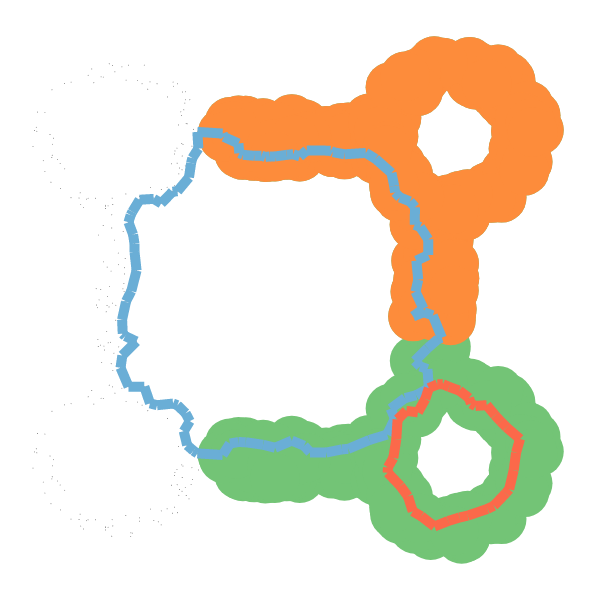

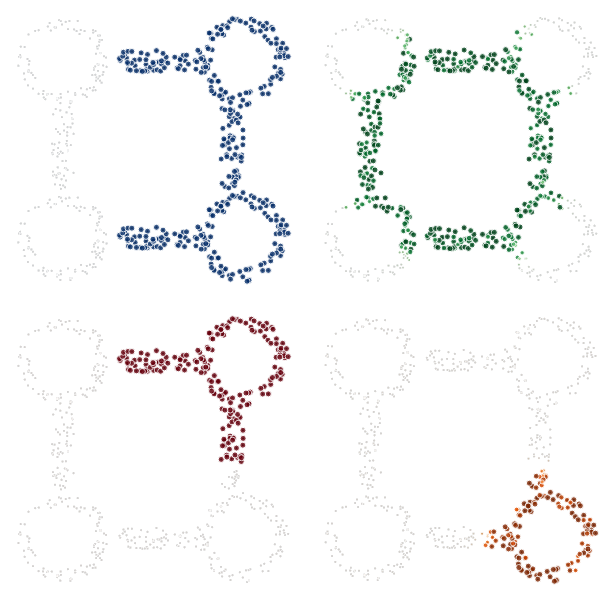

In [8]:
topological_features = topf.topf(base_points, draw_signature_heatmaps = "Separate plots", draw_reps = True, fixed_num_features= [2,2])

## Random point cloud
This can for example be useful in point clouds with no clear structure. By modifiying `interpolation_coefficient` (default value `0.3`), we can control at which point in the filtration we construct our simplicial complexes thus determining how sharp or smooth topoligical features will be.

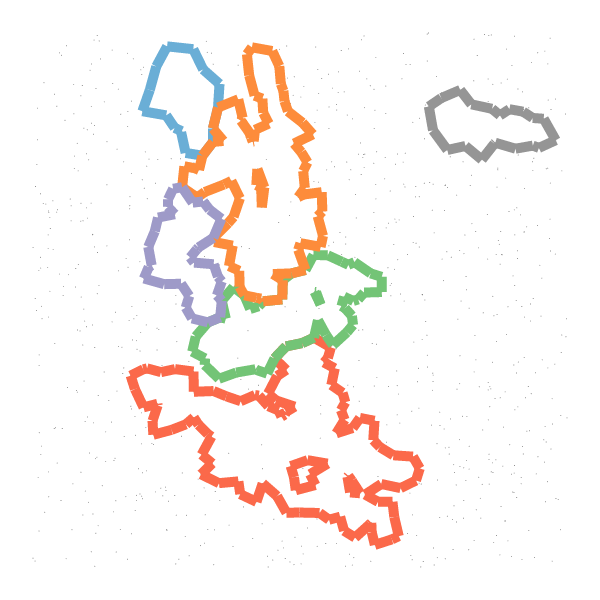

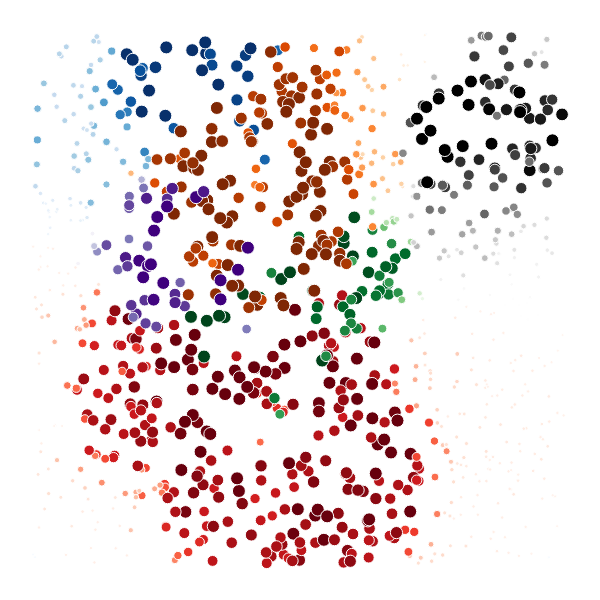

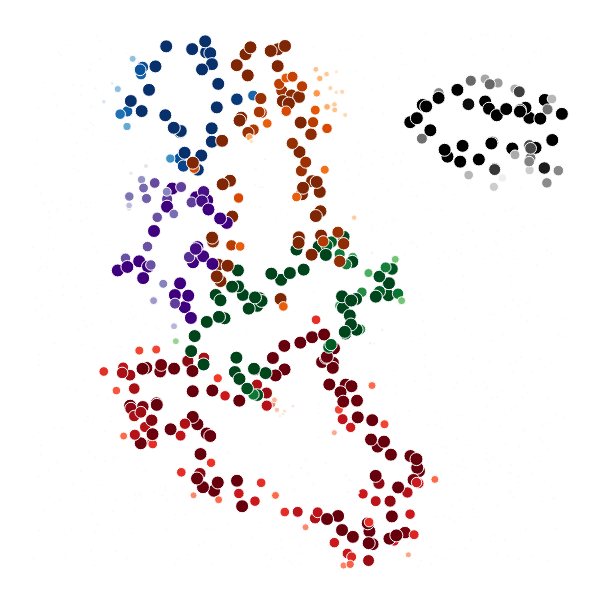

In [9]:
base_points = np.random.rand(1000, 2)
topological_features = topf.topf(base_points, draw_signature_heatmaps = "One plot", draw_reps = True, fixed_num_features= [0,6], interpolation_coefficient=0.6)
topological_features = topf.topf(base_points, draw_signature_heatmaps = "One plot", fixed_num_features= [0,6], interpolation_coefficient=0.1)


## More examples

We showcase the behaviour of topf on the `2d` topological clustering benchmark suite (TCBS):

4spheresTRUE.csv
(656, 3)
656


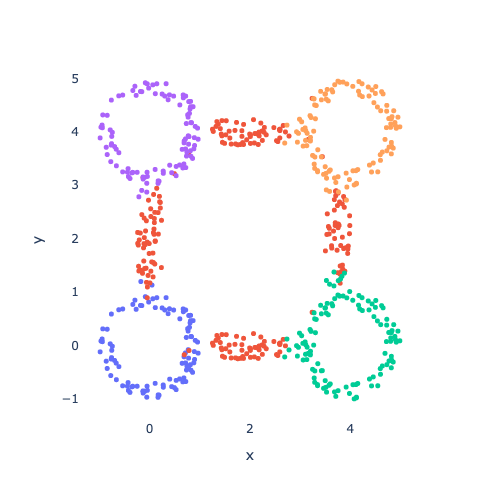

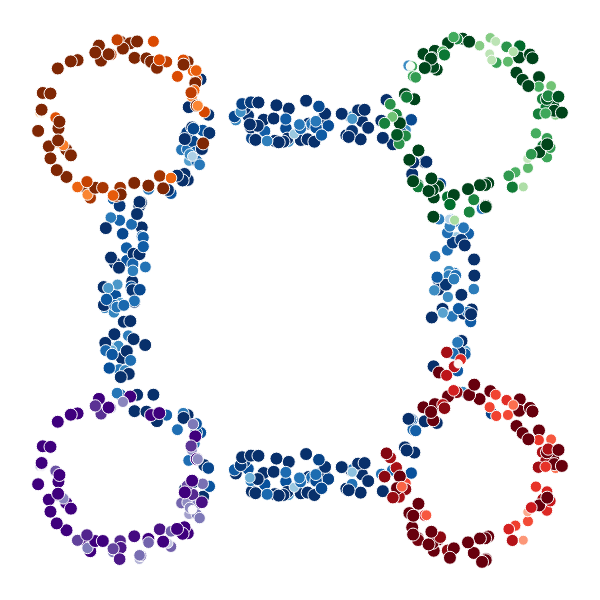

ARI:  0.8148675019006624
EllipsesInEllipsesTRUE.csv
(158, 3)
158


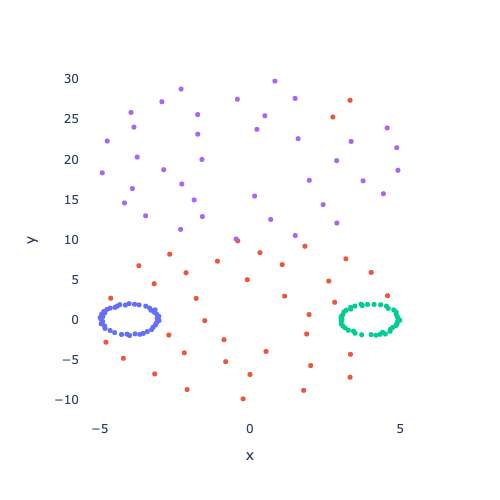

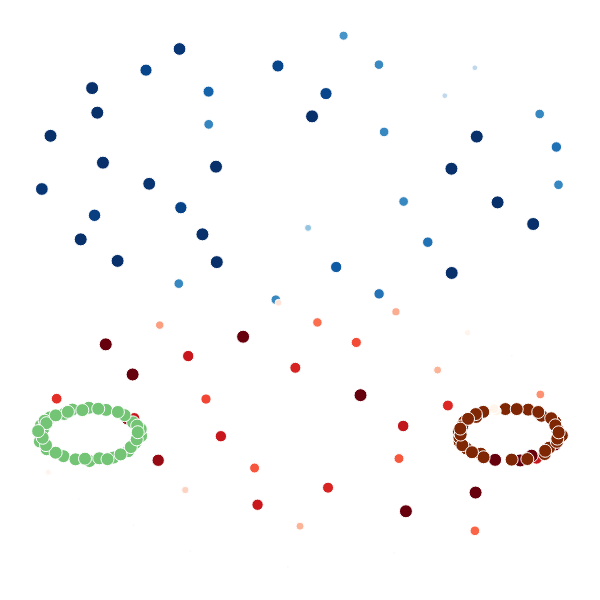

ARI:  0.9344849636593038
spheresAndGridTRUE.csv
(866, 3)
866


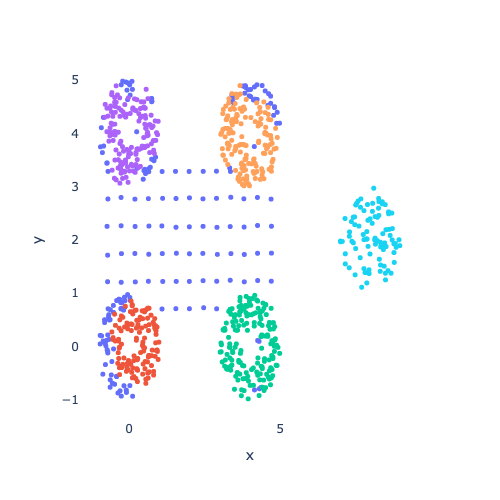

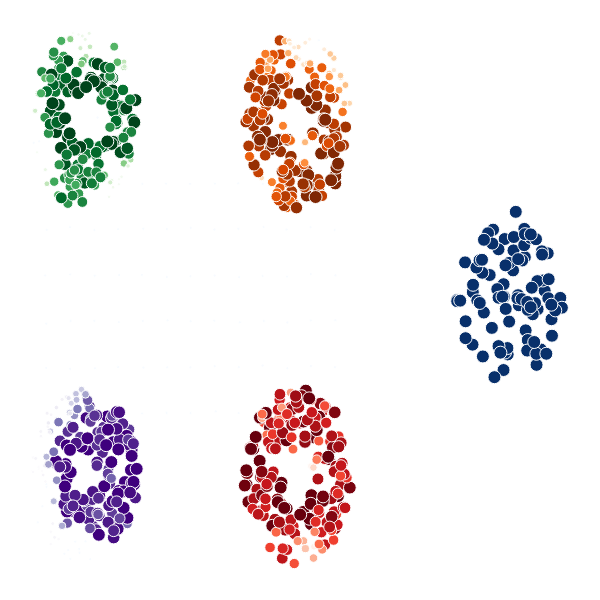

ARI:  0.6998843753481397
HalvedCircleTRUE.csv
(249, 3)
249


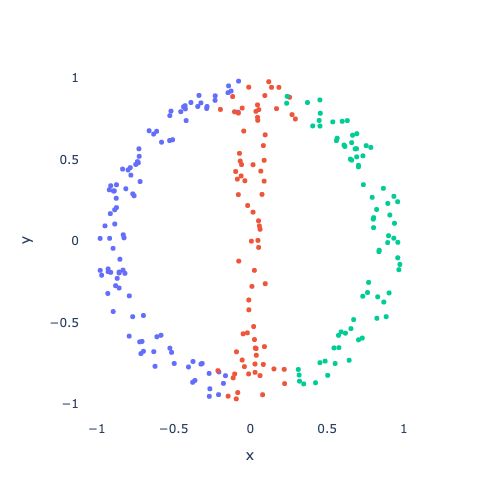

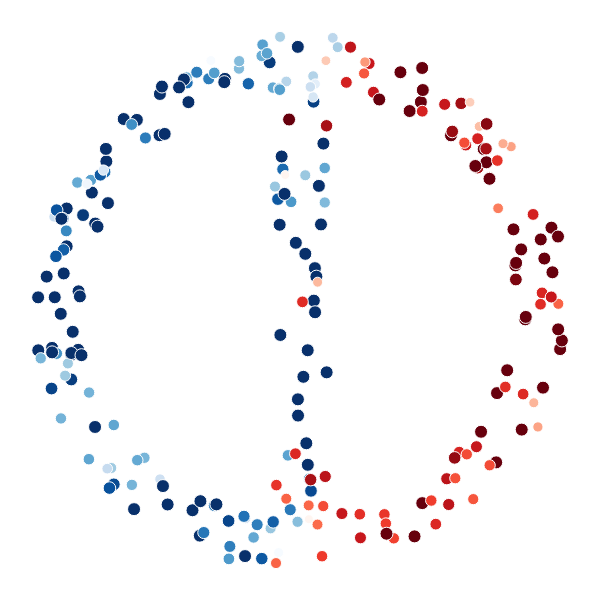

ARI:  0.71300329603038


In [10]:
num_dict = {'4spheresTRUE.csv': 5, 'spaceship_v2TRUE.csv':5,'spheresAndGridTRUE.csv':6, "Two_Spheres_2_CirclesTRUE.csv":4, "SphereinCircleTRUE.csv":3, "HalvedCircleTRUE.csv":3, "EllipsesInEllipsesTRUE.csv":4}
for filename in os.listdir('TopologicalClusteringBenchmarkSuite/dim1'):
    if filename.endswith(".csv"):
        points_with_labels = np.loadtxt('TopologicalClusteringBenchmarkSuite/dim1/'+filename, delimiter=',')
        print(filename)
        print(points_with_labels.shape)
        base_points = points_with_labels[:,:2]
        print(len(base_points))
        true_labels = points_with_labels[:,2]
        signatures, output_dict = topf.topf(base_points, n_clusters = num_dict[filename], draw_final_clustering = True, draw_signature_heatmaps = "One plot", return_dict = True)
        print("ARI: ", sklearn.metrics.adjusted_rand_score(true_labels, output_dict['labels']))
